In [1]:
from necro_uncal_new import model
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
# from necro import model
import pandas as pd
from pysb.simulator import SimulationResult

In [9]:
print(model.observables)

ComponentSet([
 Observable('MLKLa_obs', MLKL(bRHIM=None, state='active')),
 Observable('CII_C8a_obs', TRADD(brec=None, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=1, btraf=None, bRHIM=None, bMLKL=None, state='deub') % FADD(bDD=1, bDED1=2, bDED2=None) % C8(bf=2, flip=4, state='A') % flip_L(bDED=4, state='A')),
 Observable('CII_RIP3_obs', TRADD(brec=None, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=1, btraf=None, bRHIM=5, bMLKL=None, state='deub') % FADD(bDD=1, bDED1=None, bDED2=None) % RIP3(bRHIM=5, bDD=None, state='unmod')),
 Observable('RIP1RIP3unmod_obs', RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=5, bMLKL=None, state='po4') % RIP3(bRHIM=5, bDD=1, state='po4') % MLKL(bRHIM=1, state='unmod')),
 Observable('CI_k63_obs', TNF(brec=1) % TNFR(blig=1, brip=2) % TRADD(brec=2, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=None, btraf=4, bRHIM=None, 

In [ ]:
# l = [i for i in range(10)]
tspan = np.linspace(0, 1440, 100)
solver100 = ScipyOdeSimulator(model, tspan=tspan)
result100 = solver100.run(param_values=all_pars[:])
df = result100.dataframe

In [56]:
result100 = SimulationResult.load('necro_25000params_TNF10_pydream_5chns.h5')
df = result100.dataframe

In [57]:
df['Flip_obs'] = result100.observable(m.flip_L(bDED=None, state='A'))
df['C8Flip_obs'] = result100.observable(m.C8(bf=None, flip=4, state='A') % m.flip_L(bDED=4, state='A'))
df['RIP1RIP3unmod_obs'] = result100.observable(m.RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=5, bMLKL=None, state='po4') % m.RIP3(bRHIM=5, bDD=1, state='po4') % m.MLKL(bRHIM=1, state='unmod'))


In [ ]:
x100 = np.array([.5, 1.5, 4.5, 8, 12, 16])
y100 = np.array([
0.00885691708746097*5544,0.0161886154261265*5544,
0.0373005242261882*5544,
0.0798939020159581*5544,
0.639729406776*5544,
1*5544])
y10 = np.array([0.0106013664572332*5544,
0.00519576571714913*5544,
0.02967443048221*5544,
0.050022163974868*5544,
0.198128107774737*5544,
0.560551401148672*5544])
y1 = np.array([0.0060632926030143*5544,
0.00942691670200054*5544,
0.0113342231044983*5544,
0.0312716821493274*5544,
0.10956134602783*5544,
0.291058859808041*5544])
y0 = np.array([0.00777642331264696*5544,
0.00919829048298192*5544,
0.00177263616389778*5544,
0.00637961107042362*5544,
0.0136330127587403*5544,
0.10852337335697491*5544])

y100.std()

In [58]:
time = result100.tout[0]

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [59]:
idx = pd.MultiIndex.from_product([df.columns,
                                  ['mean', 'mean_minus', 'mean_plus']],
                                 names=['species', 'CI'])

ci_df = pd.DataFrame(0, idx, time)
# ci_df.head()

In [ ]:
ci_df.columns.values.shape

In [60]:
from scipy import stats
for sp in df.columns:
    for t in time: 
        sp_values = df.xs(t, level='time', drop_level=False)[sp].values # axis=1 if columns
        ci_df.loc[[sp], t] = mean_confidence_interval(sp_values)

In [61]:
# mean = ci_df.loc['MLKLa_obs'][:1].values.reshape((1441,))
# upper = ci_df.loc['MLKLa_obs'][2:3].values.reshape((1441,))
# lower = ci_df.loc['MLKLa_obs'][1:2].values.reshape((1441,))
mean_pmlkl = ci_df.loc['MLKLa_obs'][:1].values.reshape((9,))
upper_pmlkl = ci_df.loc['MLKLa_obs'][2:3].values.reshape((9,))
lower_pmlkl = ci_df.loc['MLKLa_obs'][1:2].values.reshape((9,))

In [62]:
mean_flip = ci_df.loc['Flip_obs'][:1].values.reshape((9,))
upper_flip = ci_df.loc['Flip_obs'][2:3].values.reshape((9,))
lower_flip = ci_df.loc['Flip_obs'][1:2].values.reshape((9,))

In [63]:
mean_C8flip = ci_df.loc['C8Flip_obs'][:1].values.reshape((9,))
upper_C8flip = ci_df.loc['C8Flip_obs'][2:3].values.reshape((9,))
lower_C8flip = ci_df.loc['C8Flip_obs'][1:2].values.reshape((9,))

In [64]:
mean_necro = ci_df.loc['RIP1RIP3unmod_obs'][:1].values.reshape((9,))
upper_necro = ci_df.loc['RIP1RIP3unmod_obs'][2:3].values.reshape((9,))
lower_necro = ci_df.loc['RIP1RIP3unmod_obs'][1:2].values.reshape((9,))

In [ ]:
ci_df.head()

In [ ]:
t = np.array([0., 30,  60,   120,  180, 270,  480,  960, 1440])
data = np.array([0.001, 0.003, 0.01, 0.0152, 0.03, 0.05, 0.5, 0.99, 1.])

In [ ]:
plt.figure()
plt.plot(time/60, mean_pmlkl, color = 'black', label ='mean', zorder = 3)
# plt.scatter(t/60, data*5544, color ='black', label = 'pMLKL_data',zorder = 2)
plt.fill_between(time/60, lower_pmlkl, upper_pmlkl, label ='95% CI',zorder = 1,alpha = 0.2)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title('95% Confidence Interval of pMLKL under 100ng/ml of TNFa')
plt.savefig('pMLKL_100TNF_95CI_CI.pdf', format = 'pdf')
plt.show()

In [ ]:
plt.figure()
plt.plot(time/60, mean_flip, color = 'black', label ='mean', zorder = 3)
plt.fill_between(time/60, lower_flip, upper_flip, label ='95% CI',zorder = 1, alpha = 0.2)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title('95% Confidence Interval of pMLKL under 100ng/ml of TNFa')
# plt.savefig('pMLKL_100TNF_95CI_CI.pdf', format = 'pdf')
plt.show()

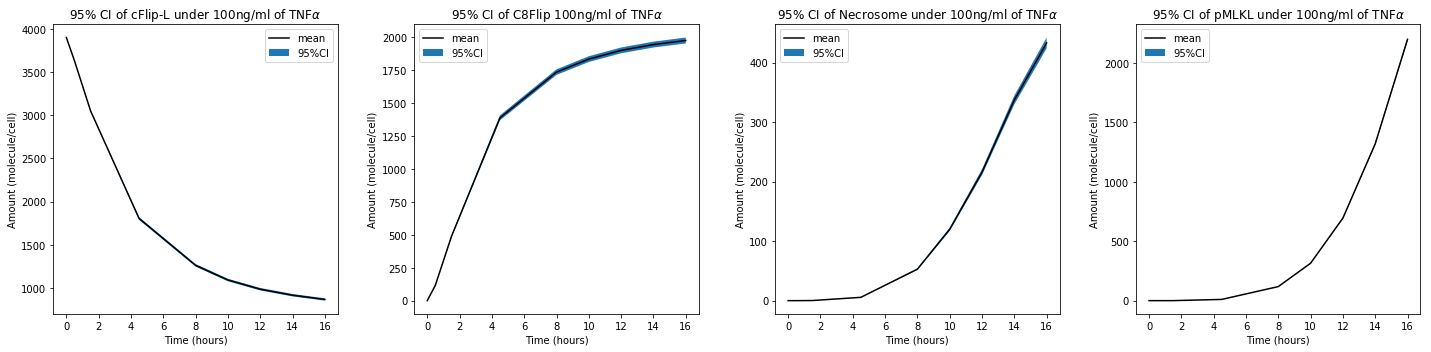

In [65]:
plt.figure(figsize = (20,5))
# plt.figure()
plt.subplot(141)
plt.plot(time/60, mean_flip, color = 'black', label ='mean', zorder = 2)
plt.fill_between(time/60, lower_flip, upper_flip, label ='95%CI',zorder = 1)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title(r'95% CI of cFlip-L under 100ng/ml of TNF$\alpha$')

# plt.figure()
plt.subplot(142)
plt.plot(time/60, mean_C8flip , color = 'black', label ='mean', zorder = 2)
plt.fill_between(time/60, lower_C8flip , upper_C8flip , label ='95%CI',zorder = 1)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title(r'95% CI of C8Flip 100ng/ml of TNF$\alpha$')

plt.subplot(143)
plt.plot(time/60, mean_necro, color = 'black', label ='mean', zorder = 2)
plt.fill_between(time/60, lower_necro, upper_necro, label ='95%CI',zorder = 1)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title(r'95% CI of Necrosome under 100ng/ml of TNF$\alpha$')

# plt.figure()
plt.subplot(144)
plt.plot(time/60, mean_pmlkl, color = 'black', label ='mean', zorder = 2)
plt.fill_between(time/60, lower_pmlkl, upper_pmlkl, label ='95%CI',zorder = 1)
plt.xlabel('Time (hours)')
plt.ylabel('Amount (molecule/cell)')
plt.legend()
plt.title(r'95% CI of pMLKL under 100ng/ml of TNF$\alpha$')
plt.tight_layout()
# plt.savefig('necro_25000params_TNF1_pydream_5chns_95CI.pdf', format='pdf')
plt.show()

In [ ]:
# Visualize the result
plt.plot(time, mean, 'or')
# plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(time, lower, upper, color='gray', alpha=0.2)
plt.xlim(0, 10);

In [ ]:
# Define a function for the line plot with intervals
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Display legend
    ax.legend(loc = 'best')

In [ ]:
df = result100.dataframe.transpose()
df[0].ix['MLKLa_obs'][:]

In [ ]:
x = result100.observables
x[0]

In [ ]:
solver10 = ScipyOdeSimulator(model, tspan=tspan)
result10 = solver10.run(initials = {TNF(brec=None): 232}, param_values=all_pars[:])

In [ ]:
solver1 = ScipyOdeSimulator(model, tspan=tspan)
result1 = solver1.run(initials = {TNF(brec=None): 23}, param_values=all_pars[:])

In [ ]:
solver01 = ScipyOdeSimulator(model, tspan=tspan)
result01 = solver01.run(initials = {TNF(brec=None): 2}, param_values=all_pars[:])

In [ ]:
df = result100.dataframe(columns=['time', 'pmlkl'])
# df['time'] = len(df.loc[:]['MLKLa_obs'].iloc[:])
# df['pmlkl'] = df.loc[:]['MLKLa_obs'].iloc[:]
mlkl = df.loc[:]['MLKLa_obs'].iloc[:]
mlklt = mlkl.transpose()

In [ ]:
mlklt.head()

In [ ]:
mlkl.to_csv('pmlkl_10tpts.csv')

In [ ]:
df.head()

In [ ]:
a = df.loc[:]['CII_obs'].iloc[:]
a.head()

In [ ]:
b = a.T

In [ ]:
b.head()

In [ ]:
df.loc[:]['CII_C8a_obs'].iloc[:].max()

In [ ]:
CII_obs = df.loc[:]['CII_obs'].iloc[:]/df.loc[:]['CII_obs'].iloc[:].max()
CII_obs.head()

In [ ]:
df.loc[:]['CII_obs'].iloc[:].head()

In [ ]:
df.head()

In [ ]:
from tropical.visualize_trajectories import VisualizeTrajectories

In [ ]:
necro_clusters = VisualizeTrajectories(model, result100, clusters=None)

In [ ]:
necro_clusters.plot_cluster_dynamics(species=['MLKLa_obs'], fig_name='pmlkl_100ngml.png')
plt.show()

In [ ]:
necro_clusters.plot_cluster_dynamics(species=['CII_obs'], fig_name='CII_100ngml.png')
plt.show()

In [ ]:
necro_clusters.plot_cluster_dynamics(species=['CII_C8a_obs'], fig_name='CII_C8_100ngml.png')
plt.show()

In [ ]:
plt.figure()
for i in range(0,500):
    plt.plot(tspan, df.loc[:]['CII_obs'].iloc[:]/df.loc[:]['CII_obs'].iloc[:].max())
plt.show()

In [ ]:
pmlkl = df.loc[:]['MLKLa_obs'].iloc[:]
print(len(pmlkl))

In [ ]:
mean = []
mlklp = []
for i in range(len(tspan)):
    mlklp[i] = df.loc[i:i]['MLKLa_obs'].iloc[i:i]
    mean[i] = np.mean(mlklp[i]) 

In [ ]:
import pandas as pd
df_pmlkl = pd.DataFrame(columns=['time', 'pmlkl', 'meanpmlkl', 'lpmlkl', 'uplmlkl'])
df_pmlkl['time'] = len(df.loc[:]['MLKLa_obs'].iloc[:])
df_pmlkl['pmlkl'] = df.loc[:]['MLKLa_obs'].iloc[:]
df_pmlkl['meanpmlkl'] = np.mean(pmlkl)
df_pmlkl

In [ ]:
import numpy as np, scipy.stats as st
ci = st.t.interval(0.95, len(pmlkl)-1, loc=np.mean(pmlkl), scale=st.sem(pmlkl))

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mean_confidence_interval(df.loc[:]['MLKLa_obs'].iloc[:], 0.95)

In [ ]:
# Filling between line y3 and line y4
plt.fill_between(tspan, 2392.356, 2402.73, color='grey', alpha='0.5')
plt.show()

In [ ]:
mean = np.mean(x) 
np.percentile(x,5)
np.percentile(x,95)

In [ ]:
ci

In [ ]:
ax = sns.lineplot(x="time", y="pMLKL", data=mlklp)